In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [618]:
from datetime import datetime

In [619]:
sales = pd.read_csv('../supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [620]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [621]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [622]:
# datetime_str = '09/19/22 13:55:26'   %H:%M:%S'
# pd.to_datetime
# sales['Date_formatted'] = datetime.strptime(sales['Date'].to_string(), "%m/%d/%y")

sales['Date_formatted'] = pd.to_datetime(sales['Date'])


In [623]:
sales['season'] = (sales['Date_formatted'].dt.month%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}
sales['season_name'] = sales['season'].map(seasons)


In [624]:
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M').dt.time


In [625]:
sales['Hour'] = pd.to_datetime(sales['Time'], format='%H:%M:%S').dt.hour


In [626]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
sales['time_of_day_draft'] = pd.cut(sales['Hour'], bins=b, labels=l, include_lowest=True)

def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

sales['time_of_day'] = sales['Hour'].apply(f)


In [627]:
sales.drop(['time_of_day_draft'], axis=1, inplace=True)

In [628]:
sales['Month'] = sales['Date_formatted'].dt.month

In [629]:
sales['Day'] = sales['Date_formatted'].dt.day

In [630]:
sales['Month'].value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

In [631]:
# sales.columns

## 1. Average Sale per Day (across 3 months)

In [632]:
ave_sales_by_day = round(sales.pivot_table(index=['Day'], values=["Total"], aggfunc=np.average), 2).reset_index()
# sales_by_day['Month_Day'] = sales_by_day['Month'].astype(str) + " " + sales_by_day['Day'].astype(str)
ave_sales_by_day.head()

,Day,Total
0,1,350.86
1,2,316.17
2,3,344.42
3,4,274.40
4,5,312.16


Text(0, 0.5, 'Average Sales')

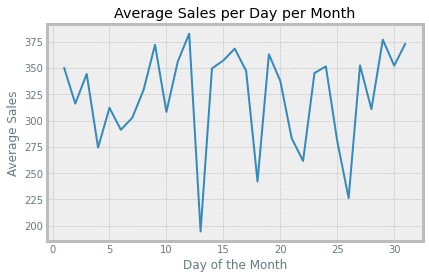

In [633]:
plt.plot(ave_sales_by_day['Day'], ave_sales_by_day['Total'])
plt.title('Average Sales per Day per Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sales')

In [634]:
ave_sales_by_day_by_month = round(sales.pivot_table(index=['Month','Day'], values=["Total"], aggfunc=np.average), 2).reset_index()
# sales_by_day['Month_Day'] = sales_by_day['Month'].astype(str) + " " + sales_by_day['Day'].astype(str)
ave_sales_by_day_by_month.head()

,Month,Day,Total
0,1,1,395.43
1,1,2,243.19
2,1,3,259.77
3,1,4,270.61
4,1,5,294.72


In [635]:
month_1 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 1]
month_2 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 2]
month_3 = ave_sales_by_day_by_month[ave_sales_by_day_by_month['Month'] == 3]

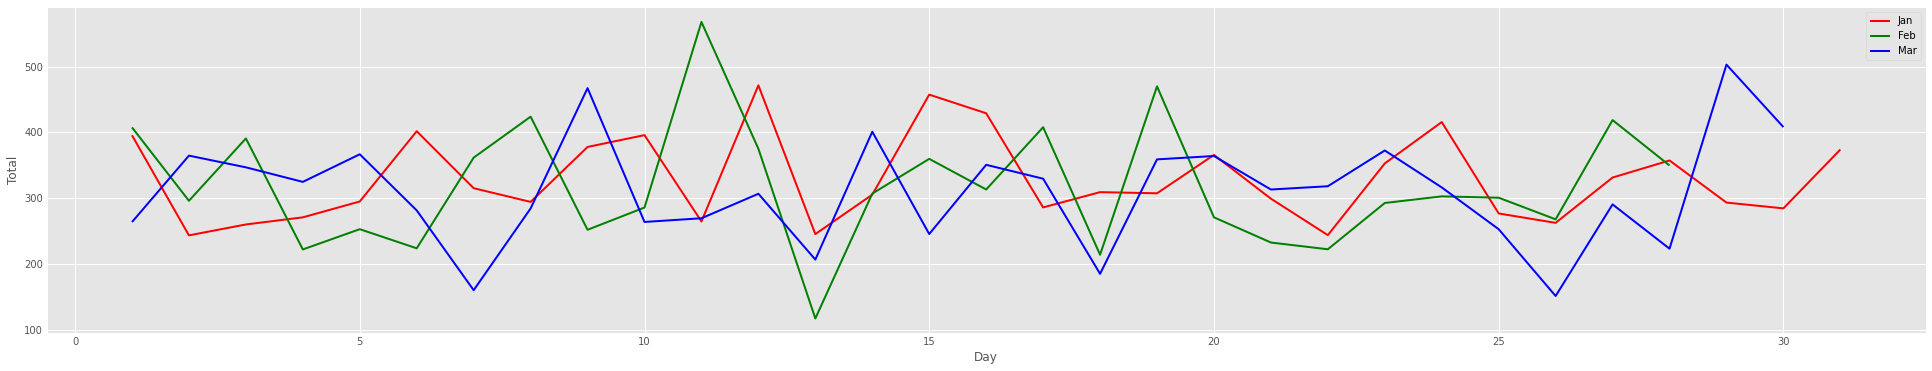

In [664]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (30, 6))

sns.lineplot(data = month_1, x = 'Day', y='Total', color = 'red', errorbar = None)
sns.lineplot(data = month_2, x = 'Day', y='Total', color = 'green', errorbar = None)
sns.lineplot(data = month_3, x = 'Day', y='Total', color = 'blue', errorbar = None)
ax.legend(labels = ['Jan','Feb','Mar'])

## 2. Average Transaction per Month (across 3 months)

In [637]:
ave_trans_by_day = round(sales.pivot_table(index=['Day'], values=["Invoice ID"], aggfunc = np.count_nonzero ), 2).reset_index()
ave_trans_by_day.head()

,Day,Invoice ID
0,1,28
1,2,40
2,3,36
3,4,29
4,5,41


Text(0, 0.5, 'Average Transaction per Day')

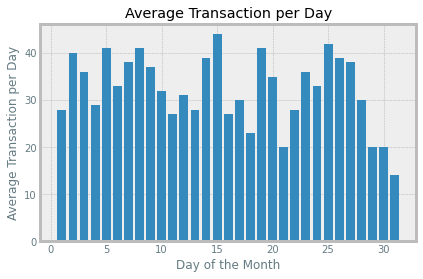

In [638]:
plt.bar(ave_trans_by_day['Day'], ave_trans_by_day['Invoice ID'])
plt.title('Average Transaction per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Average Transaction per Day')

Text(0, 0.5, 'Average Transaction per Day')

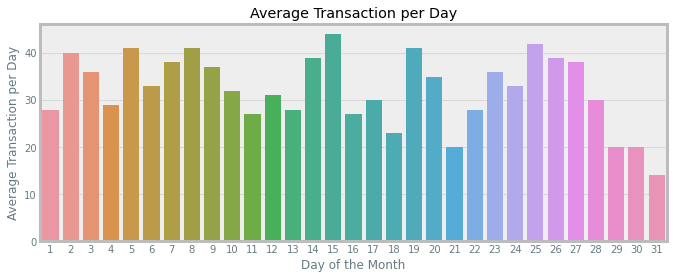

In [639]:
plt.figure(figsize=(10,4))
sns.barplot(data = ave_trans_by_day, x = 'Day', y='Invoice ID')
plt.title('Average Transaction per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Average Transaction per Day')

## 3. Rating vs Total Quantity Sold

In [640]:
rating_labels = ['Very low', 'Low', 'Moderate', 'High', 'Very High']
bins = pd.qcut(sales['Rating'], 5, labels = rating_labels)
#add bins to dataframe
sales = pd.concat([sales, bins], axis = 1).reset_index() #axis indicates the column
# sales['rating_label'] = sales.lookup(sales['Rating'], bins)


In [641]:
sales.columns = ['index', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Date_formatted', 'season', 'season_name', 'Hour',
       'time_of_day', 'Month', 'Day', 'rating_label']

sales.drop('index', axis=1, inplace=True)
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Date_formatted', 'season', 'season_name', 'Hour',
       'time_of_day', 'Month', 'Day', 'rating_label'],
      dtype='object')

(array([365.,   0., 280.,   0., 355.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

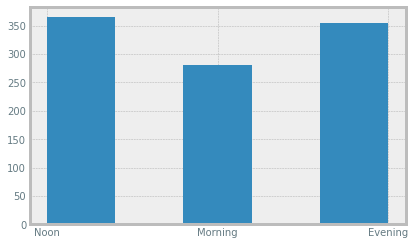

In [642]:
plt.hist(sales['time_of_day'], bins = 5)

Text(0, 0.5, 'Sales')

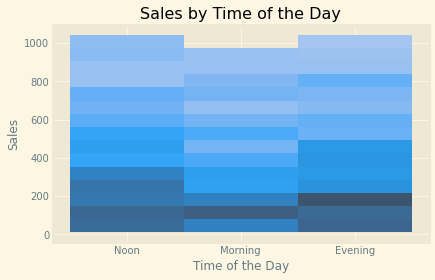

In [643]:
plt.style.use('Solarize_Light2')
sns.histplot(data=sales, x = 'time_of_day', y ='Total')
# plt.colorbar(label="Total Sales by Time of the Day", orientation="horizontal")
plt.title('Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Sales')

## 4. Sales based on Rating, split by Customer Type

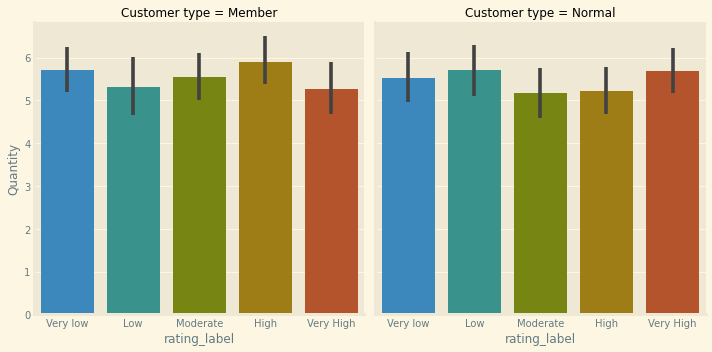

In [644]:
sns.catplot(data=sales, x='rating_label', y='Quantity', col = 'Customer type', kind = 'bar')
# row = 'Payment',

In [645]:
rating_vs_sold = sales.groupby('rating_label').sum().reset_index()
rating_vs_sold

,rating_label,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,season,Hour,Month,Day
0,Very low,11947.31,1182,3490.3705,73297.7805,69807.41,1000.000000,3490.3705,968.7,288,3180,424,3236
1,Low,10851.17,1088,2977.9670,62537.3070,59559.34,938.095238,2977.9670,1157.8,266,2959,392,3108
2,Moderate,10694.17,1033,2867.8225,60224.2725,57356.45,919.047619,2867.8225,1344.6,266,2802,399,2756
3,High,10952.50,1134,3001.1015,63023.1315,60022.03,971.428571,3001.1015,1662.2,277,3044,417,3095
4,Very High,11226.98,1073,3042.1075,63884.2575,60842.15,933.333333,3042.1075,1839.4,248,2925,361,3061


## 5. Values per Transaction based on Payment type

In [646]:
sales_per_transaction = round(sales.pivot_table(index='Payment', values=['Total', 'Invoice ID'], aggfunc={'Total':np.sum, 'Invoice ID':np.count_nonzero}), 2).reset_index()
sales_per_transaction['VPT'] = round((sales_per_transaction['Total']/ sales_per_transaction['Invoice ID']), 2)
sales_per_transaction


,Payment,Invoice ID,Total,VPT
0,Cash,344,112206.57,326.18
1,Credit card,311,100767.07,324.01
2,Ewallet,345,109993.11,318.82


([<matplotlib.patches.Wedge at 0x14f285a20>,
 [Text(-0.23812203088899286, 0.18247711748408765, 'Cash'),
  Text(-0.045721682341628114, -0.29649540934701035, 'Credit Card'),
  Text(0.2841677456988096, 0.096170121682655, 'Ewallet')],
 [Text(-0.4762440617779857, 0.3649542349681753, '34.7%'),
  Text(-0.09144336468325623, -0.5929908186940207, '31.2%'),
  Text(0.5683354913976192, 0.19234024336531, '34.1%')])

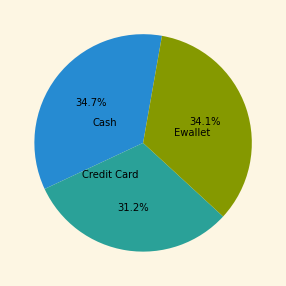

In [647]:
labels = ['Cash', 'Credit Card', 'Ewallet']
figure = plt.figure(figsize=(10,5))
plt.pie(sales_per_transaction['Total'], labels=labels, autopct='%1.1f%%', labeldistance=0.3, startangle=80 )


In [648]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig = px.line_polar(sales_per_transaction, r=sales_per_transaction['VPT'], 
                    theta=sales_per_transaction['Payment'], 
                    line_close=True, 
                    width = 500, height = 400)
fig.show()

## 6. Frequencies of Values of Transaction by Time of the Day

<AxesSubplot:xlabel='Total', ylabel='Density'>

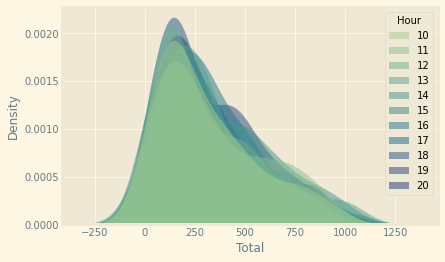

In [649]:
sns.kdeplot(
   data=sales, x="Total", hue="Hour",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

## 7. Rating vs Unit Price

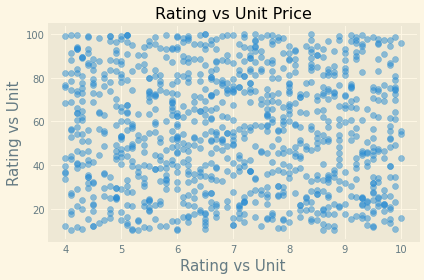

In [650]:
price_data = sales['Rating']
delta1 = sales['Unit price']
# Marker size in units of points^2
#volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
#close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]
fig, ax = plt.subplots()
ax.scatter(price_data[:-1], delta1[1:], alpha=0.5)
ax.set_xlabel(r'Rating vs Unit', fontsize=15)
ax.set_ylabel(r'Rating vs Unit', fontsize=15)
ax.set_title('Rating vs Unit Price')
ax.grid(True)
fig.tight_layout()
plt.show()


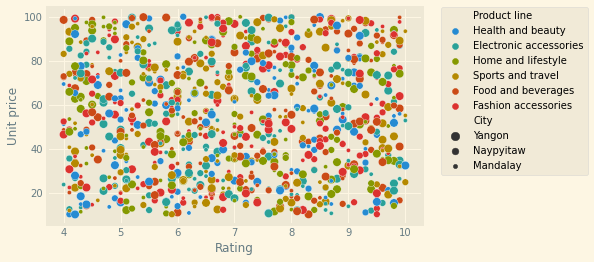

In [651]:
sns.scatterplot(data=sales, x ='Rating', y = 'Unit price', hue = 'Product line', size = 'City')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## 8. Rating vs Quantity & Sales (3D)

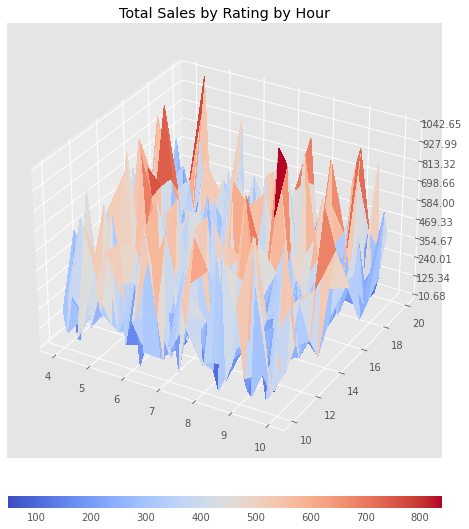

In [671]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (8, 8))

X = sales['Rating']
Y = sales['Hour']
Z = sales['Total']

# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
axins = inset_axes(ax,
                    width="100%",  
                    height="3%",
                    loc='lower center',
                    borderpad=-5
                   )

fig.colorbar(surf, shrink=0.3, aspect=10, cax=axins, orientation="horizontal")
ax.set_title('Total Sales by Rating by Hour')
plt.show()

## 9. Descriptive Statistics

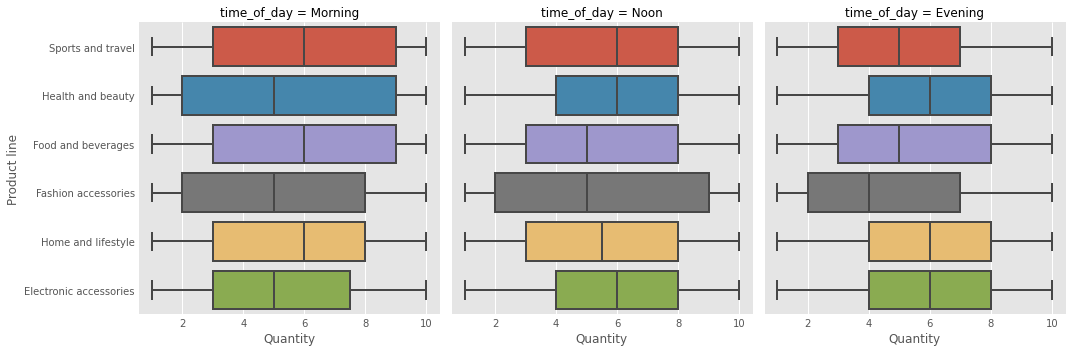

In [668]:
sns.catplot(data=sales, x='Quantity', y='Product line', col = 'time_of_day', kind = 'box')

{'whiskers': [<matplotlib.lines.Line2D at 0x14f808070>,
 'caps': [<matplotlib.lines.Line2D at 0x14f808610>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f7dfd60>,
 'medians': [<matplotlib.lines.Line2D at 0x14f808bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14f808e80>,
 'means': []}

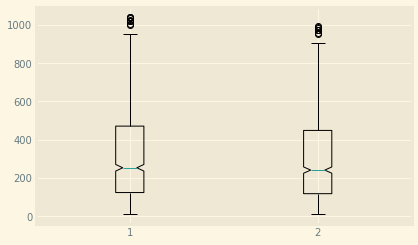

In [654]:
fig, ax = plt.subplots()
plt.boxplot([sales['Total'], sales['cogs']], notch = True, meanline = True)
# plt.boxplot(sales['Total'], notch = True, meanline = True)


## 10. Rating vs Time of the Day


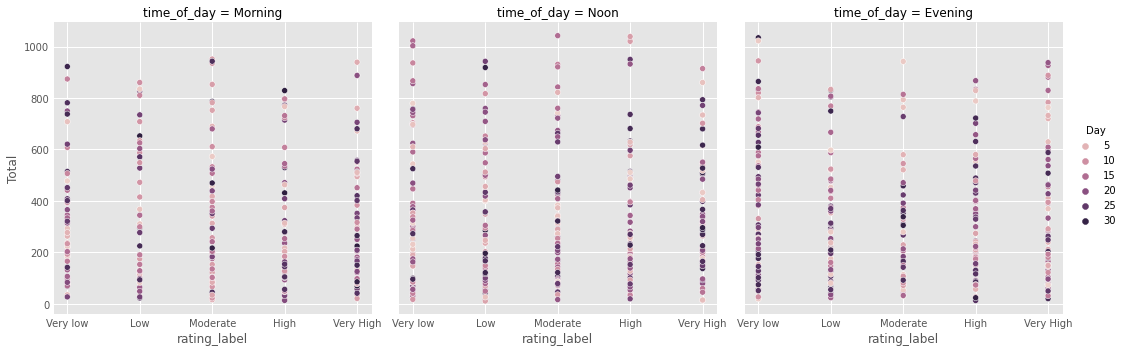

In [666]:
sns.relplot(data=sales, x="rating_label", y="Total", hue = 'Day', col="time_of_day")

## 11. Sales vs Rating

<AxesSubplot:xlabel='Total', ylabel='rating_label'>

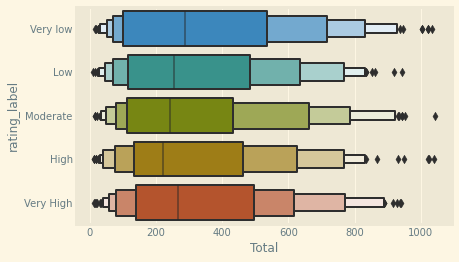

In [656]:
sns.boxenplot(data=sales, x="Total", y="rating_label", scale = 'linear')

## 11. Correlation Among Numeric Variables

<AxesSubplot:>

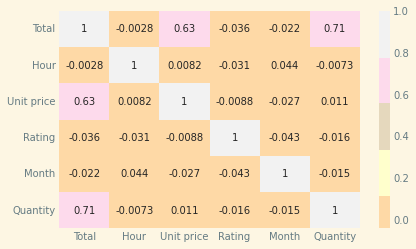

In [657]:
s_sales = sales[['Total','Hour', 'Unit price', 'Rating', 'Month', 'Quantity']]
sns.heatmap(s_sales.corr(), annot=True, cmap='Pastel1', center=0)

## 12. Cummulative Sales across 3 Months

In [658]:
sales.sort_values(['Date_formatted','Hour'], inplace=True)
sales['Cummulative_Sales'] = sales['Total'].cumsum()
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,Date_formatted,season,season_name,Hour,time_of_day,Month,Day,rating_label,Cummulative_Sales
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,...,6.9,2019-01-01,1,Winter,10,Morning,1,1,Moderate,457.443
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,5.0,2019-01-01,1,Winter,11,Morning,1,1,Very low,589.470
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,...,5.0,2019-01-01,1,Winter,11,Morning,1,1,Very low,773.556
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,9.0,2019-01-01,1,Winter,11,Morning,1,1,Very High,1662.171
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,7.7,2019-01-01,1,Winter,13,Noon,1,1,High,2283.414


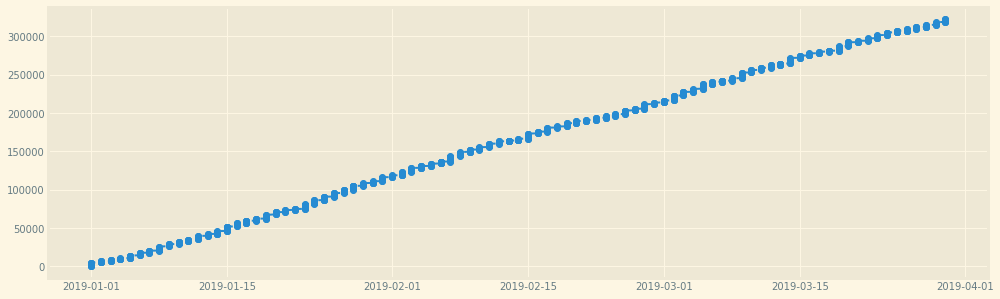

In [659]:
plt.figure(figsize = (15,5))
plt.plot(sales['Date_formatted'], sales['Cummulative_Sales'], ls = '--', marker ='o')